# Exploring Female Autism Referral Trends in England: An NHS Open Data Analysis

This project applies data analytics techniques to NHS open data to investigate patterns in female autism referrals in England, with a focus on temporal trends, age-group differences, and service-level insights.


## Project Motivation

Autism has historically been under-recognised in females, with research indicating that diagnostic criteria and clinical understanding have been shaped largely around male presentations. This has contributed to delayed, missed, or incorrect diagnoses among females, with significant implications for mental health, education, and access to appropriate support services.

In recent years, NHS England has published open datasets on autism referrals and assessment pathways, providing an opportunity to explore how referral patterns for females are evolving over time. Understanding these trends is important not only for evaluating awareness and access to services, but also for informing healthcare planning and identifying potential systemic barriers within diagnostic pathways.

This project is motivated by the need to examine whether female autism referrals in England demonstrate distinct temporal and age-based patterns, and to consider what these trends may suggest about visibility, service demand, and diagnostic access for autistic females.

## Objectives

The objectives of this project are to:

- Design and implement an end-to-end ETL pipeline to extract, clean, and structure NHS England autism referral data for analysis.
- Explore temporal trends in female autism referrals to identify changes in suspected autism referrals and open cases over time.
- Analyse age-group patterns within female referrals to examine how referral volumes differ across developmental stages.
- Develop clear static and interactive visualisations to communicate trends and patterns in an accessible and stakeholder-oriented manner.
- FCritically evaluate the limitations and ethical considerations associated with using aggregated public healthcare data to study autism referral pathways.


## Project Hypotheses

- H1: Female suspected autism referrals show an overall increasing trend over time, indicating rising demand and/or improved recognition.
- H2: The number of females with open suspected autism referrals remains consistently higher than new referrals, suggesting backlog pressure within diagnostic pathways.
- H3: Age-group patterns differ within females, with 0–17 and 18+ showing distinct referral volumes, supporting the need for age-targeted service planning.


## Inputs


All datasets used in this analysis are publicly available, aggregated, and anonymised. No personal or identifiable information is included.

Sources:
- NHS Digital: Autism diagnosis statistics

Ethical considerations include responsible interpretation of diagnosis data and avoidance of deficit-based language.



## Outputs

Outputs produced by this project include:

• A cleaned and transformed analytical dataset derived from NHS England autism statistics.
• A series of static visualisations illustrating female autism referral trends, distributions, and comparisons across age groups and reporting periods.
• An interactive Plotly dashboard (female_autism_dashboard.html) visualising female autism referral trends over time in England.
• A fully documented Jupyter Notebook containing the ETL pipeline, exploratory analysis, visualisations, and methodological commentary.


## Data Preparation and Management

### File Organisation and Data Management Rationale

This project separates files into dedicated folders to support good data governance and reproducibility:

- `data/raw/` stores the original NHS dataset unchanged, preserving a clear source of truth.
- `data/processed/` contains cleaned and transformed versions of the data used for analysis.
- `reports/` stores generated analytical outputs, including the interactive Plotly dashboard.

This structure prevents accidental overwriting of source data, improves traceability of analytical steps, and aligns with best practices in professional data analytics workflows.


## Use of Generative AI (GenAI) in this Project

GenAI (CoPilot) was used to support the workflow:
1. **Code support and debugging:** assisting with troubleshooting environment issues (VS Code/Jupyter/Plotly rendering) and improving the reliability of file outputs (e.g., ensuring folders exist before writing HTML).
2. **Data storytelling and communication:** refining the project title, motivation, objectives, and writing clear interpretations of each chart for a non-technical audience.


## Additional Comments

This project demonstrates how publicly available healthcare data can be used to explore gender-based disparities in autism referral patterns. A key challenge was working with aggregated administrative data, which required careful interpretation to avoid misleading conclusions. The project also highlighted the importance of transparent data cleaning, reproducible workflows, and ethical framing when analysing sensitive health-related topics.

From a technical perspective, the project strengthened skills in building an end-to-end data analysis pipeline, including structured data transformation, exploratory analysis, and the development of both static and interactive visual outputs suitable for non-technical stakeholders.

Overall, this work illustrates how data analytics can support healthcare service planning by identifying patterns in referral demand and highlighting areas where further targeted research is needed.



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Shazia Mujahid\\Documents\\vscode-projects\\sum-1\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Shazia Mujahid\\Documents\\vscode-projects\\sum-1'

# Section 1: Extract

---

In [4]:
from pathlib import Path
import os

here = Path.cwd()
print("📍 Current working directory:", here)

# Find the folder that CONTAINS the 'data' directory
for p in [here] + list(here.parents):
    if (p / "data").exists():
        project_root = p
        break

os.chdir(project_root)
print("✅ Project root set to:", Path.cwd())

print("📁 Raw data files:", list((Path.cwd() / "data" / "raw").glob("*")))


📍 Current working directory: c:\Users\Shazia Mujahid\Documents\vscode-projects\sum-1
✅ Project root set to: c:\Users\Shazia Mujahid\Documents\vscode-projects\sum-1
📁 Raw data files: [WindowsPath('c:/Users/Shazia Mujahid/Documents/vscode-projects/sum-1/data/raw/autism_england.csv')]


In [5]:
import pandas as pd

df = pd.read_csv("data/raw/autism_england.csv")
display(df.head())
df.info()

df.head()

,REPORTING_PERIOD_START,REPORTING_PERIOD_END,STATUS,BREAKDOWN,PRIMARY_LEVEL,PRIMARY_LEVEL_DESCRIPTION,SECONDARY_LEVEL,SECONDARY_LEVEL_DESCRIPTION,METRIC,METRIC_NAME,METRIC_VALUE
0,01/04/2025,30/04/2025,Latest Available Data,Age Group,10 to 17,People aged 10 to 17,NONE,NONE,ASD12,Number of new suspected autism referrals in th...,3055
1,01/04/2025,30/04/2025,Latest Available Data,Age Group,10 to 17,People aged 10 to 17,NONE,NONE,ASD13,Number of closed suspected autism referrals in...,2880
2,01/04/2025,30/04/2025,Latest Available Data,Age Group,10 to 17,People aged 10 to 17,NONE,NONE,ASD16,Number of patients with an open suspected auti...,62015
3,01/04/2025,30/04/2025,Latest Available Data,Age Group,10 to 17,People aged 10 to 17,NONE,NONE,ASD16a,Number of patients with an open suspected auti...,55235
4,01/04/2025,30/04/2025,Latest Available Data,Age Group,10 to 17,People aged 10 to 17,NONE,NONE,ASD16f,Number of patients with an open suspected auti...,1159


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   REPORTING_PERIOD_START       9396 non-null   object
 1   REPORTING_PERIOD_END         9396 non-null   object
 2   STATUS                       9396 non-null   object
 3   BREAKDOWN                    9396 non-null   object
 4   PRIMARY_LEVEL                9396 non-null   object
 5   PRIMARY_LEVEL_DESCRIPTION    9396 non-null   object
 6   SECONDARY_LEVEL              9396 non-null   object
 7   SECONDARY_LEVEL_DESCRIPTION  9396 non-null   object
 8   METRIC                       9396 non-null   object
 9   METRIC_NAME                  9396 non-null   object
 10  METRIC_VALUE                 9396 non-null   object
dtypes: object(11)
memory usage: 807.6+ KB


,REPORTING_PERIOD_START,REPORTING_PERIOD_END,STATUS,BREAKDOWN,PRIMARY_LEVEL,PRIMARY_LEVEL_DESCRIPTION,SECONDARY_LEVEL,SECONDARY_LEVEL_DESCRIPTION,METRIC,METRIC_NAME,METRIC_VALUE
0,01/04/2025,30/04/2025,Latest Available Data,Age Group,10 to 17,People aged 10 to 17,NONE,NONE,ASD12,Number of new suspected autism referrals in th...,3055
1,01/04/2025,30/04/2025,Latest Available Data,Age Group,10 to 17,People aged 10 to 17,NONE,NONE,ASD13,Number of closed suspected autism referrals in...,2880
2,01/04/2025,30/04/2025,Latest Available Data,Age Group,10 to 17,People aged 10 to 17,NONE,NONE,ASD16,Number of patients with an open suspected auti...,62015
3,01/04/2025,30/04/2025,Latest Available Data,Age Group,10 to 17,People aged 10 to 17,NONE,NONE,ASD16a,Number of patients with an open suspected auti...,55235
4,01/04/2025,30/04/2025,Latest Available Data,Age Group,10 to 17,People aged 10 to 17,NONE,NONE,ASD16f,Number of patients with an open suspected auti...,1159


In [6]:
# Look for anything mentioning Female or Male in the dataset

cols_to_check = [
    "BREAKDOWN",
    "PRIMARY_LEVEL",
    "PRIMARY_LEVEL_DESCRIPTION",
    "SECONDARY_LEVEL",
    "SECONDARY_LEVEL_DESCRIPTION",
    "METRIC_NAME"
]

for col in cols_to_check:
    if col in df.columns:
        print(f"\n--- {col} ---")
        display(df[col].value_counts().head(15))


--- BREAKDOWN ---


BREAKDOWN
Ethnicity    6156
Gender       1944
Age Group     972
England       324
Name: count, dtype: int64


--- PRIMARY_LEVEL ---


PRIMARY_LEVEL
UNKNOWN       756
G             324
P             324
K             324
L             324
M             324
N             324
Not Known     324
Not Stated    324
R             324
H             324
S             324
1             324
2             324
3             324
Name: count, dtype: int64


--- PRIMARY_LEVEL_DESCRIPTION ---


PRIMARY_LEVEL_DESCRIPTION
UNKNOWN                       756
Any Other Mixed Background    324
Any Other Black Background    324
Bangladeshi                   324
Any Other Asian Background    324
Caribbean                     324
African                       324
Not Known                     324
Not Stated                    324
Chinese                       324
Indian                        324
Any other ethnic group        324
Male                          324
Female                        324
Non-Binary                    324
Name: count, dtype: int64


--- SECONDARY_LEVEL ---


SECONDARY_LEVEL
NONE    9396
Name: count, dtype: int64


--- SECONDARY_LEVEL_DESCRIPTION ---


SECONDARY_LEVEL_DESCRIPTION
NONE    9396
Name: count, dtype: int64


--- METRIC_NAME ---


METRIC_NAME
Number of new suspected autism referrals in the month                                                                                                                         210
Proportion of patients with an open suspected autism referral in the month that has been open for at least 13 weeks receiving a first appointment after more than 13 weeks    210
Number of closed suspected autism referrals in the month                                                                                                                      210
Median waiting time in days of patients with an open suspected autism referral where their first care contact was in the quarter                                              210
Number of patients with an open suspected autism referral receiving a non-Mental and Behavioural disorder diagnosis recorded in the month                                     210
Number of patients with an open suspected autism referral receiving a Mental and Behavioural disor

---

# Section 2 - Transforming 

In [7]:
import numpy as np

df.columns = df.columns.str.lower()

# Create a sex column based on where NHS encoded it
df["sex"] = np.where(
    df["primary_level_description"].str.contains("female", case=False, na=False),
    "Female",
    np.where(
        df["primary_level_description"].str.contains("male", case=False, na=False),
        "Male",
        "Other/Not specified"
    )
)

df["sex"].value_counts()


sex
Other/Not specified    8748
Male                    324
Female                  324
Name: count, dtype: int64

In [8]:
# Filter female autism data 

df_female = df[df["sex"] == "Female"].copy()

print("Female rows:", len(df_female))
display(df_female.head())


Female rows: 324


,reporting_period_start,reporting_period_end,status,breakdown,primary_level,primary_level_description,secondary_level,secondary_level_description,metric,metric_name,metric_value,sex
1296,01/04/2025,30/04/2025,Latest Available Data,Gender,2,Female,NONE,NONE,ASD12,Number of new suspected autism referrals in th...,6695,Female
1297,01/04/2025,30/04/2025,Latest Available Data,Gender,2,Female,NONE,NONE,ASD12a,Number of new suspected autism referrals for t...,2795,Female
1298,01/04/2025,30/04/2025,Latest Available Data,Gender,2,Female,NONE,NONE,ASD12b,Number of new suspected autism referrals for t...,3900,Female
1299,01/04/2025,30/04/2025,Latest Available Data,Gender,2,Female,NONE,NONE,ASD13,Number of closed suspected autism referrals in...,5665,Female
1300,01/04/2025,30/04/2025,Latest Available Data,Gender,2,Female,NONE,NONE,ASD13a,Number of closed suspected autism referrals fo...,2385,Female


In [9]:
# Convert key columns to usable types 

# reporting_period_start : date

# metric_value : number

# metric_name : tells us what the number means (waiters, referrals, etc.)

# Dates
df["reporting_period_start"] = pd.to_datetime(df["reporting_period_start"], dayfirst=True)
df["reporting_period_end"] = pd.to_datetime(df["reporting_period_end"], dayfirst=True)

# Metric value to numeric
df["metric_value"] = pd.to_numeric(df["metric_value"], errors="coerce")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   reporting_period_start       9396 non-null   datetime64[ns]
 1   reporting_period_end         9396 non-null   datetime64[ns]
 2   status                       9396 non-null   object        
 3   breakdown                    9396 non-null   object        
 4   primary_level                9396 non-null   object        
 5   primary_level_description    9396 non-null   object        
 6   secondary_level              9396 non-null   object        
 7   secondary_level_description  9396 non-null   object        
 8   metric                       9396 non-null   object        
 9   metric_name                  9396 non-null   object        
 10  metric_value                 8194 non-null   float64       
 11  sex                          9396 non-null 

In [10]:
# Identify autism metrics 

df_female["metric_name"].value_counts().head(20)


metric_name
Number of new suspected autism referrals in the month                                                                                                                                          6
Number of patients aged 0 to 17 with an open suspected autism referral receiving an autism diagnosis in the month                                                                              6
Proportion of patients with an open suspected autism referral in the month that has been open for at least 13 weeks that have not had a care contact appointment recorded                      6
Proportion of patients aged 0 to 17 with an open suspected autism referral in the month that has been open for at least 13 weeks receiving a first appointment in 13 weeks or less             6
Proportion of patients aged 18 and over with an open suspected autism referral in the month that has been open for at least 13 weeks receiving a first appointment in 13 weeks or less         6
Proportion of patients 

# Section 3 – Preparing female autism datasets

In [11]:
# Keep only useful columns

cols = [
    "reporting_period_start",
    "reporting_period_end",
    "breakdown",
    "primary_level",
    "primary_level_description",
    "secondary_level",
    "secondary_level_description",
    "metric_name",
    "metric_value",
    "sex"
]

df = df[cols].copy()

# Standardise text

for c in ["breakdown","primary_level","primary_level_description",
          "secondary_level","secondary_level_description","metric_name","sex"]:
    df[c] = df[c].astype(str).str.strip()

# Create time variable

df["month"] = df["reporting_period_start"].dt.to_period("M").astype(str)

# Convert metric to numeric

df["metric_value"] = pd.to_numeric(df["metric_value"], errors="coerce")

# Female-only dataset

df_female = df[df["sex"] == "Female"].copy()

print("Female records:", len(df_female))
display(df_female.head())


Female records: 324


,reporting_period_start,reporting_period_end,breakdown,primary_level,primary_level_description,secondary_level,secondary_level_description,metric_name,metric_value,sex,month
1296,2025-04-01,2025-04-30,Gender,2,Female,NONE,NONE,Number of new suspected autism referrals in th...,6695.0,Female,2025-04
1297,2025-04-01,2025-04-30,Gender,2,Female,NONE,NONE,Number of new suspected autism referrals for t...,2795.0,Female,2025-04
1298,2025-04-01,2025-04-30,Gender,2,Female,NONE,NONE,Number of new suspected autism referrals for t...,3900.0,Female,2025-04
1299,2025-04-01,2025-04-30,Gender,2,Female,NONE,NONE,Number of closed suspected autism referrals in...,5665.0,Female,2025-04
1300,2025-04-01,2025-04-30,Gender,2,Female,NONE,NONE,Number of closed suspected autism referrals fo...,2385.0,Female,2025-04


# Section 4 - Business datasets

In [12]:
# create three analytic views:

 # Female new referrals

 # Female open referrals (backlog)

 # Female age distribution



# New suspected autism referrals (female)

female_new = df_female[df_female["metric_name"].str.contains("new suspected", case=False, na=False)]

# Open suspected autism referrals (female backlog)

female_open = df_female[df_female["metric_name"].str.contains("open suspected", case=False, na=False)]

# Female age profile

female_age = df_female[df_female["metric_name"].str.contains("aged", case=False, na=False)]

print("New referrals:", len(female_new))
print("Open referrals:", len(female_open))
print("Age metrics:", len(female_age))


New referrals: 18
Open referrals: 288
Age metrics: 216


# Section 5 - Feature Engineering

In [13]:
monthly_new = female_new.groupby("month", as_index=False)["metric_value"].sum()
monthly_open = female_open.groupby("month", as_index=False)["metric_value"].sum()

female_trends = pd.merge(monthly_new, monthly_open, on="month", how="outer", suffixes=("_new", "_open"))

# Backlog pressure indicator

female_trends["backlog_pressure"] = female_trends["metric_value_new"] - female_trends["metric_value_open"]

female_trends = female_trends.sort_values("month")

display(female_trends.head())

# Save processed dataset (LO4)

female_trends.to_csv("data/processed/female_autism_trends_v1.csv", index=False)


,month,metric_value_new,metric_value_open,backlog_pressure
0,2025-04,13390.0,647121.0,-633731.0
1,2025-05,12240.0,647750.0,-635510.0
2,2025-06,12965.0,667560.0,-654595.0
3,2025-07,13570.0,635902.0,-622332.0
4,2025-08,7980.0,650611.0,-642631.0


# Section 6 - Data Visualisations 

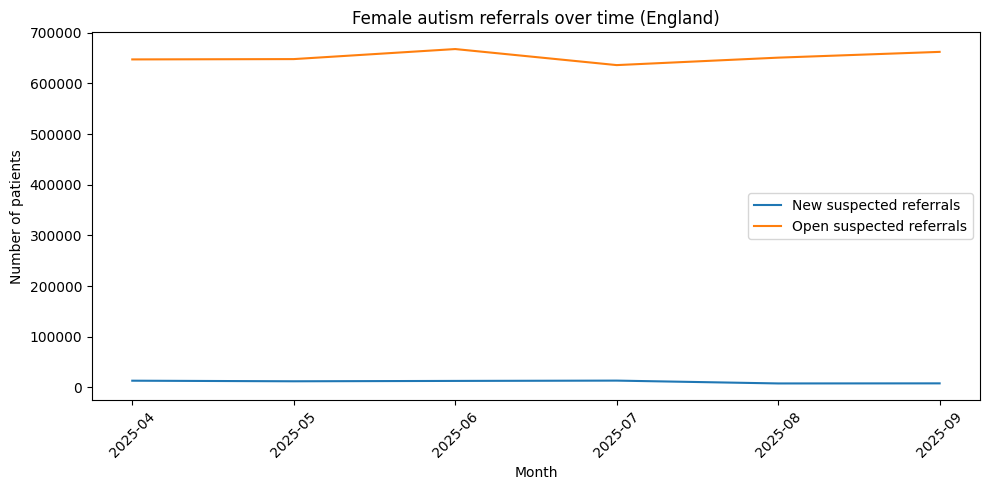

In [14]:
# Line plot for time series data 

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(female_trends["month"], female_trends["metric_value_new"], label="New suspected referrals")
plt.plot(female_trends["month"], female_trends["metric_value_open"], label="Open suspected referrals")
plt.xticks(rotation=45)
plt.title("Female autism referrals over time (England)")
plt.xlabel("Month")
plt.ylabel("Number of patients")
plt.legend()
plt.tight_layout()
plt.show()


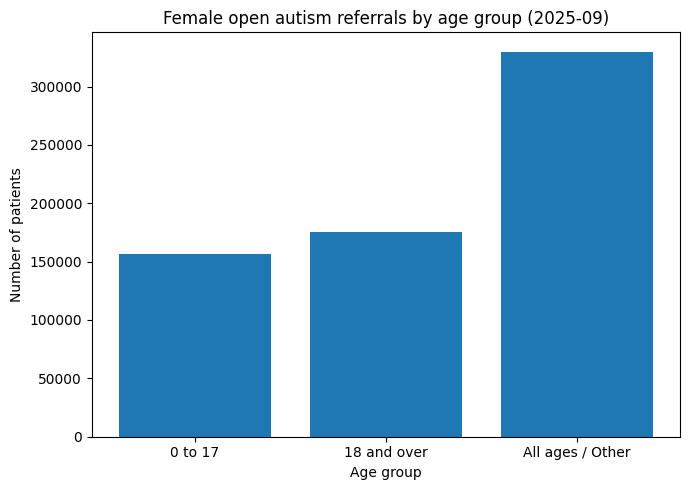

In [15]:
# Bar chart for latest month snapshot 

female_open["primary_level_description"].value_counts() # returns only female 

# additional feature engineering to add age column 

# Derive age group from metric_name


import numpy as np

df_female["age_group"] = np.where(
    df_female["metric_name"].str.contains("0 to 17", case=False, na=False),
    "0 to 17",
    np.where(
        df_female["metric_name"].str.contains("18", case=False, na=False),
        "18 and over",
        "All ages / Other"
    )
)

df_female["age_group"].value_counts()


# Rebuild female dataset 

female_open = df_female[
    df_female["metric_name"].str.contains("open suspected", case=False, na=False)
].copy()

female_open["age_group"].value_counts()


# Bar chart of Female open autism referrals by age group (latest month)


latest_month = female_open["month"].max()
latest_open = female_open[female_open["month"] == latest_month]

age_open = latest_open.groupby("age_group", as_index=False)["metric_value"].sum()

plt.figure(figsize=(7,5))
plt.bar(age_open["age_group"], age_open["metric_value"])
plt.title(f"Female open autism referrals by age group ({latest_month})")
plt.xlabel("Age group")
plt.ylabel("Number of patients")
plt.tight_layout()
plt.show()


### Female autism referrals by age group

Age group was not available as a structured field and was derived from NHS metric descriptions. This chart presents the distribution of open suspected autism referrals among females by age group in the most recent reporting period. The chart highlights how diagnostic demand is different between children/young people and adults, supporting service planning and targeted diagnostic provision.


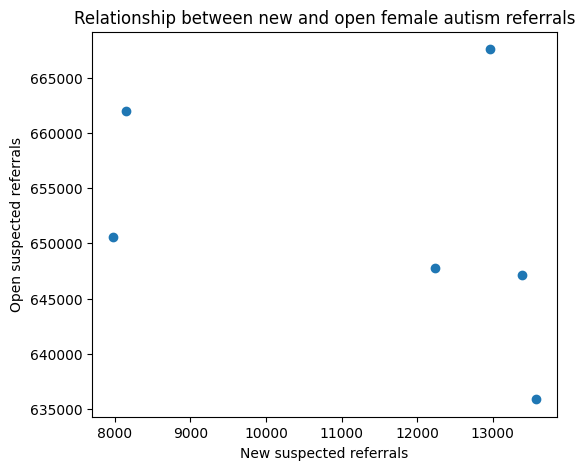

In [16]:
# Scatterplot - display the relationships between new & open female autism referrals 

plt.figure(figsize=(6,5))
plt.scatter(female_trends["metric_value_new"], female_trends["metric_value_open"])
plt.xlabel("New suspected referrals")
plt.ylabel("Open suspected referrals")
plt.title("Relationship between new and open female autism referrals")
plt.show()


In [18]:
# Interactive Dashboard 

import plotly.express as px
from pathlib import Path

Path("reports").mkdir(exist_ok=True)

fig = px.line(
    female_trends,
    x="month",
    y=["metric_value_new", "metric_value_open"],
    title="Interactive: Female autism referrals over time (England)",
    labels={"value": "Patients", "month": "Month"}
)

fig.show()
fig.write_html("reports/female_autism_dashboard.html", include_plotlyjs="cdn")
print("✅ Saved to reports/female_autism_dashboard.html")


✅ Saved to reports/female_autism_dashboard.html


Interactive Dashboard: Female Autism Referrals Over Time

This interactive line chart presents the visual trends in female autism referrals in England over time, comparing newly suspected cases with the number of patients currently on open referral pathways. The dashboard allows users to explore monthly changes, identify peaks and declines, and directly compare demand for new assessments against existing service caseloads.

The visualisation highlights that while new suspected autism referrals among females remain significantly lower than the number of open cases, both metrics follow similar temporal patterns, suggesting ongoing systemic pressure on diagnostic services. This interactive approach allows stakeholders to interrogate the data dynamically, supporting more informed discussion around capacity, waiting lists, and potential under-diagnosis in female populations.

# Conclusion: 

This project analysed NHS England autism referral data to explore patterns in female autism diagnosis and service demand over time. Using a full ETL pipeline, the dataset was cleaned, transformed, and structured for descriptive, trend-based, and visual analysis.

The findings indicate that while newly suspected autism referrals among females remain substantially lower than the number of patients on open referral pathways, both measures show similar trends across time. This suggests sustained pressure on diagnostic services and highlights the likelihood of long waiting lists and potential under-diagnosis.

The interactive dashboard further demonstrates how temporal analysis can support healthcare planning by enabling stakeholders to explore referral dynamics and service load more effectively. Overall, this project illustrates how data analytics can be applied to public health datasets to surface meaningful insights around gender disparities, service accessibility, and long-term demand.

# Limitations and Ethical Considerations

This analysis is limited by the structure of the specific NHS England dataset used. The data is aggregated and, in this extract, does not include individual-level demographic variables such as ethnicity, socioeconomic status, or confirmed diagnostic outcomes. As a result, the scope for deeper intersectional analysis of how autism referral pathways may differ across multiple social and identity factors is restricted.

In addition, the dataset reflects suspected autism referrals and open cases rather than confirmed diagnoses. Consequently, the trends observed may be influenced by service capacity, administrative processes, and policy or reporting changes, rather than accurately representing underlying prevalence alone.

Ethically, this project uses fully anonymised, open-access public sector data. No personally identifiable information is included. Care has been taken to avoid stigmatising interpretations, and the findings are framed from a systems-level perspective, recognising that autism identification rates are shaped by healthcare access, diagnostic practices, and social awareness rather than individual characteristics.

Future research could integrate additional NHS datasets that include ethnicity and indices of multiple deprivation, alongside outcome-level diagnostic data. This would enable a more comprehensive intersectional analysis of autism referral pathways and help identify whether particular groups of females experience compounded barriers to timely diagnosis and support.